### **Titanic Data Analysis**

The **Titanic dataset** is one of the most well-known datasets in the data science and machine learning community. It is based on the real-life sinking of the RMS Titanic on **April 15, 1912**, after hitting an iceberg during its maiden voyage. Out of the 2,224 passengers and crew aboard, over 1,500 died, making it one of the deadliest commercial peacetime maritime disasters.

The dataset commonly used for analysis is available from [Kaggle](https://www.kaggle.com/c/titanic), and includes information about:

#### 🔍 Key Features
- `PassengerId`: Unique ID for each passenger
- `Survived`: Survival status (0 = No, 1 = Yes)
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `Name`, `Sex`, `Age`: Personal details
- `SibSp`: Number of siblings/spouses aboard
- `Parch`: Number of parents/children aboard
- `Ticket`, `Fare`: Ticket number and fare paid
- `Cabin`: Cabin number (often missing)
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### 💡 Domain Insights
- **Women and children** had a higher survival rate due to the "women and children first" policy.
- **1st class passengers** were more likely to survive compared to 2nd and 3rd class.
- Passengers from **Southampton** (the majority) had a lower survival rate.
- **Age and family relationships** influenced survival (e.g., very young children had higher chances).

---

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
titanic=pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


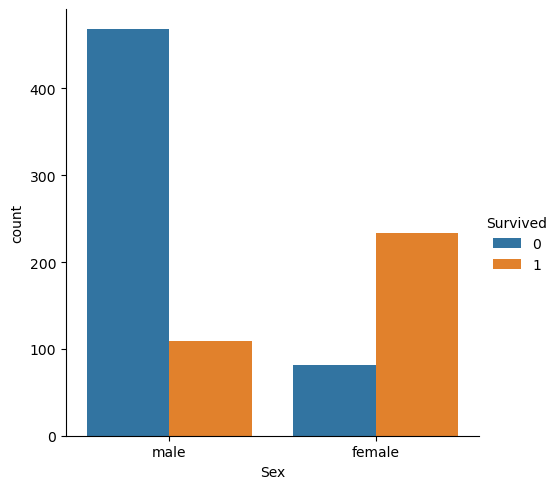

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Countplot 
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = titanic) 


<Axes: xlabel='Survived', ylabel='Pclass'>

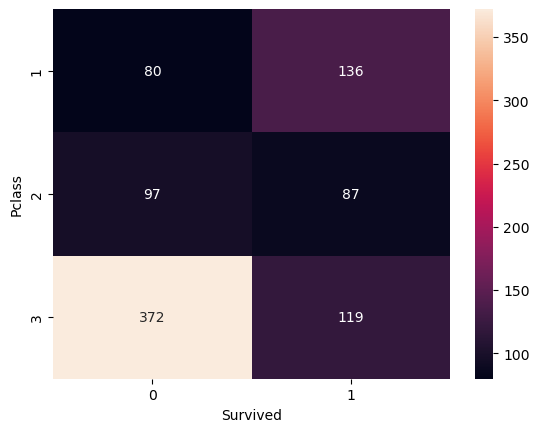

In [7]:
# Group the dataset by Pclass and Survived and then unstack them 
group = titanic.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 


<Axes: xlabel='Sex', ylabel='Age'>

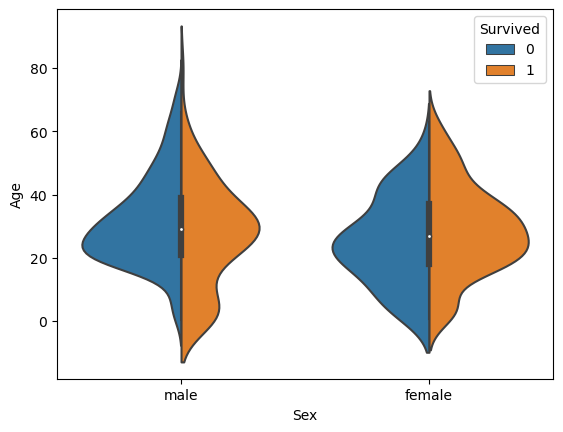

In [8]:
# Violinplot Displays distribution of data 
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = titanic, split = True) 


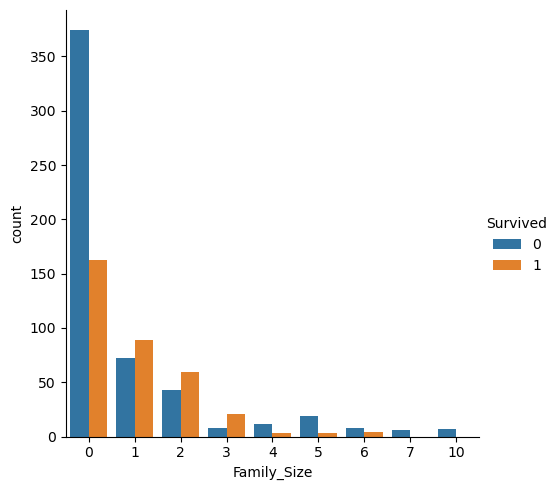

In [10]:
# Adding a column Family_Size 
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp'] 

# Adding a column Alone 
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

sns.catplot(x ="Family_Size", hue ="Survived", 
kind ="count", data = titanic) 



<Axes: xlabel='Fare_Range', ylabel='Survived'>

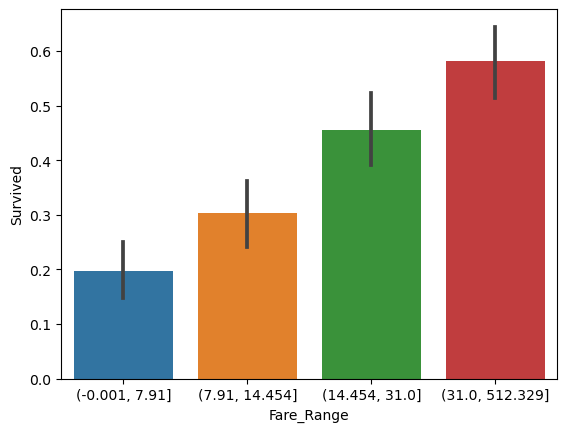

In [11]:
# Divide Fare into 4 bins 
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4) 

# Barplot - Shows approximate values based 
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived', 
data = titanic) 


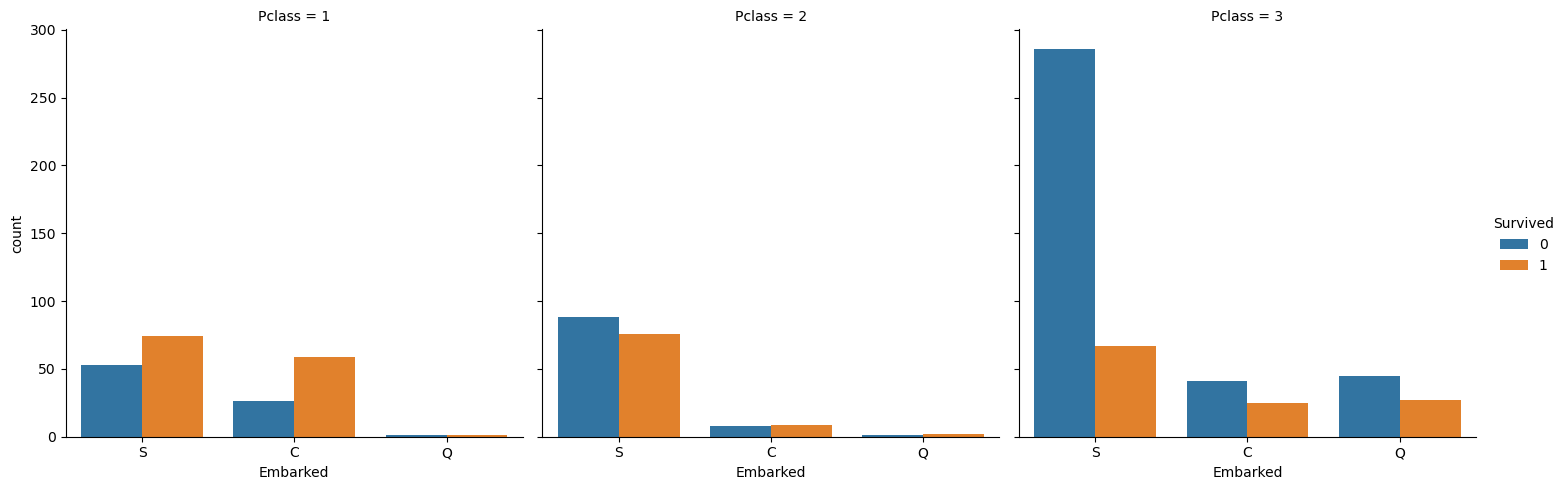

In [12]:
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = titanic) 


In [20]:
def make_pivot (param1, param2):
    df_slice = titanic[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Embarked           C   Q    S
Pclass                       
1                 85   2  127
2                 17   3  164
3                 66  72  353

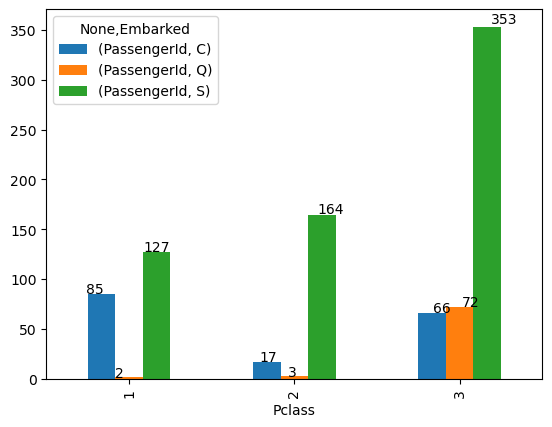

In [21]:
make_pivot ('Pclass','Embarked')

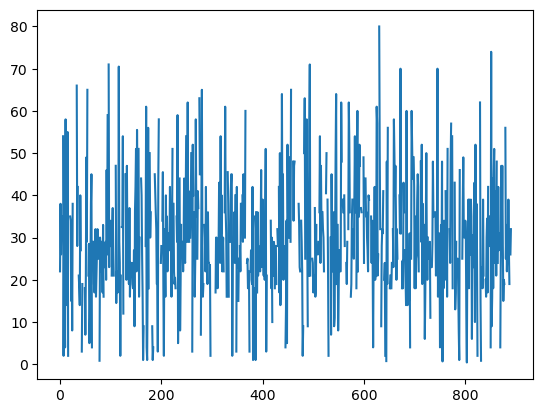

29.69911764705882


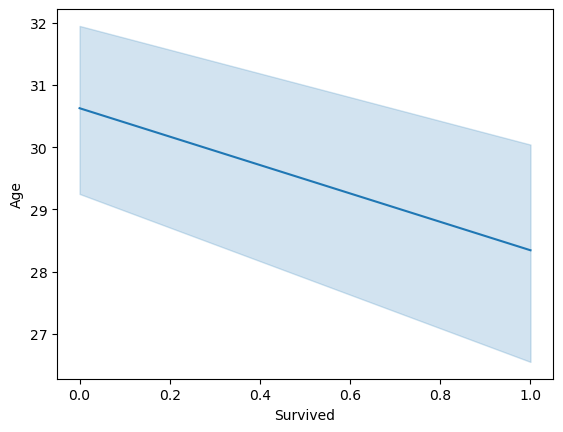

In [24]:
y2= titanic["Age"]
x2= np.arange(len(y2))
#x2 = my_data["Survived"]



plt.plot(x2, y2)
plt.show()

sns.lineplot(data=titanic, x="Survived", y="Age")
print(y2.mean())

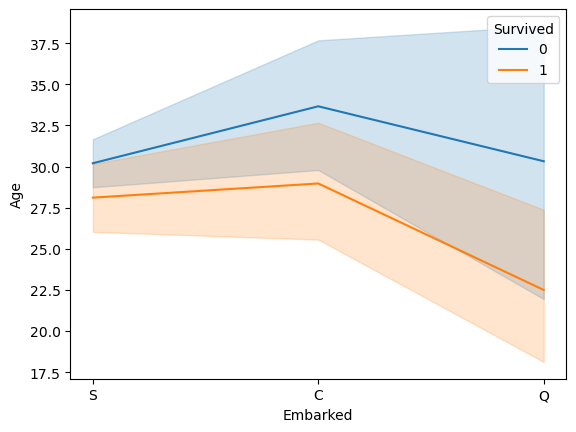

In [25]:
sns.lineplot( x = "Embarked",
			y = "Age",
			hue = "Survived",
			data = titanic);

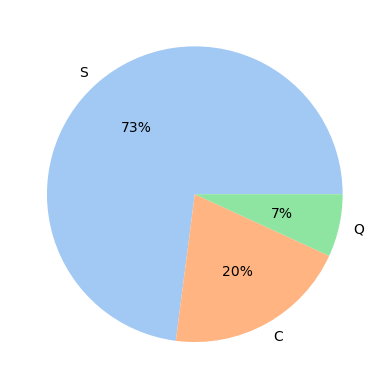

In [29]:
data = [650,180,61]
class_label = ["S", "C", "Q"]
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = class_label, colors = colors, autopct='%.0f%%')
plt.show()

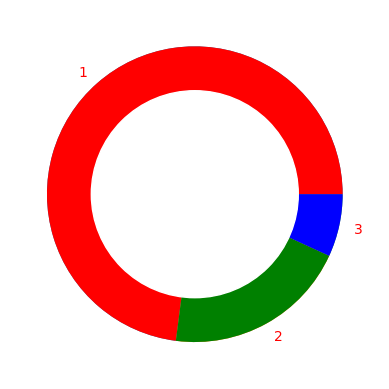

In [30]:
data = [650,180,61]
class_label = [1,2,3]
plt.pie(data)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.rcParams['text.color'] = 'red'  ###changing text colors
plt.pie(data, labels=class_label, colors=['red','green','blue']) ### Adding data labels
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

### ✅ Conclusion 

From the analysis of the Titanic dataset, we can conclude the following:

1. **Gender and Class Played a Crucial Role**:
   - Females had a significantly higher survival rate than males.
   - Passengers in **1st class** had better survival chances due to better cabin locations and priority during evacuation.

2. **Age Impacted Survival**:
   - Younger passengers, especially children, were prioritized during rescue.
   - Older adults had lower survival rates.

3. **Family Relationships Helped**:
   - Passengers with family members onboard (siblings, spouses, children) had slightly better chances of survival, possibly due to mutual assistance during evacuation.

4. **Embarkation Port Had Minor Influence**:
   - Slight variations in survival rates based on embarkation ports were noted, but not a primary factor.

5. **Fare and Cabin Correlations**:
   - Higher ticket fare (often tied to higher class) correlated positively with survival.
   - Cabin information was incomplete but when available, it indicated that location mattered for survival chances.

---